# Export variables related to anthropogenic heat
- This script is used to export variables related to anthropogenic heat from simulations;
- Simulations: CNTL, TRAF at UK-Manchester. 

In [1]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [2]:
archive = f'{home_path}0_urban_traffic/archive'
start_date = '2012-01-01T00:00:00'
end_date = '2012-12-31T23:00:00'
case_list = ['cntl', 'traffic'] 
GRIDNAME_single = 'UK-MCR'   

In [3]:
df_all = pd.DataFrame()
for case in case_list:
    ds_case = xr.open_dataset(f'{archive}/{GRIDNAME_single}_{case}/lnd/hist/{GRIDNAME_single}_{case}.clm2.h0.2022-01-01-03600.nc')
    if case == 'cntl':
        var_list = ['FSH_U', 'URBAN_AC', 'URBAN_HEAT', 'VENTILATION', 'WASTEHEAT', 'FGR_U'] 
    else:
        var_list = ['FSH_U', 'URBAN_AC', 'URBAN_HEAT', 'VENTILATION', 'WASTEHEAT', 'FGR_U', 'TRAFFICFLUX']    
    for var in var_list:
        if var == 'TSA_U':
            ds_case_var = ds_case[var] - 273.15
        else:    
            ds_case_var = ds_case[var] 
        df_case_var=ds_case_var.to_dataframe().reset_index()[['time', var]]
        df_case_var.rename(columns={var: f'{var}_{case}'}, inplace=True)
        df_case_var['time'] = df_case_var['time'].dt.round('min').dt.ceil('min')
        df_case_var['time'] = pd.to_datetime(df_case_var['time'])
        if df_all.empty:
            df_all = df_case_var
        else:
            df_all = pd.merge(df_all, df_case_var, how='outer', on='time')    
df_all['TRAFFICFLUX_cntl'] = 0
df_all['AHF_cntl']  = df_all['WASTEHEAT_cntl'] + df_all['URBAN_HEAT_cntl'] + df_all['TRAFFICFLUX_cntl']    
df_all['AHF_traffic']  = df_all['WASTEHEAT_traffic'] + df_all['URBAN_HEAT_traffic'] + df_all['TRAFFICFLUX_traffic']
df_all['hour'] = df_all['time'].dt.hour
df_all['minute'] = df_all['time'].dt.minute
df_all['diurnal'] = df_all['hour'].astype(str).str.zfill(2) + ':' + df_all['minute'].astype(str).str.zfill(2)
df_all.to_csv(f'./data_for_figure/UK-Manchester.csv', index=False)
df_all

,time,FSH_U_cntl,URBAN_AC_cntl,URBAN_HEAT_cntl,VENTILATION_cntl,WASTEHEAT_cntl,FGR_U_cntl,FSH_U_traffic,URBAN_AC_traffic,URBAN_HEAT_traffic,VENTILATION_traffic,WASTEHEAT_traffic,FGR_U_traffic,TRAFFICFLUX_traffic,TRAFFICFLUX_cntl,AHF_cntl,AHF_traffic,hour,minute,diurnal
0,2022-01-01 01:00:00,-26.170258,0.0,6.337677,1.505959,1.300586,4.305870,-24.011946,0.0,6.337677,1.505959,1.300586,7.285527,8.433395,0,7.638264,16.071659,1,0,01:00
1,2022-01-01 02:00:00,-32.742588,0.0,6.229676,1.245074,1.267536,2.255315,-31.170126,0.0,6.210087,1.245074,1.267536,5.714578,8.427978,0,7.497211,15.905600,2,0,02:00
2,2022-01-01 03:00:00,-43.709030,0.0,6.177687,1.094389,1.245935,-6.408768,-42.758736,0.0,6.155823,1.060412,1.242017,-5.389267,4.213982,0,7.423622,11.611822,3,0,03:00
3,2022-01-01 04:00:00,-43.593456,0.0,6.313346,1.046665,1.235537,-14.708106,-42.123547,0.0,6.298296,1.010182,1.231165,-14.268779,4.213904,0,7.548883,11.743364,4,0,04:00
4,2022-01-01 05:00:00,-42.983097,0.0,6.431928,1.324741,1.262669,-16.880140,-41.499035,0.0,6.416971,1.302060,1.259659,-16.301218,4.213904,0,7.694597,11.890535,5,0,05:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2022-12-31 20:00:00,-6.898266,0.0,12.845634,2.527496,2.565775,-5.653594,-4.517889,0.0,11.862576,1.888831,2.370767,-4.116951,21.404926,0,15.411409,35.638268,20,0,20:00
8756,2022-12-31 21:00:00,-6.144573,0.0,12.821811,2.698227,2.569127,-2.503959,-6.345549,0.0,11.792238,2.093355,2.372515,-1.533399,17.167786,0,15.390938,31.332539,21,0,21:00
8757,2022-12-31 22:00:00,-18.048235,0.0,12.578068,2.778120,2.564362,4.239223,-9.380153,0.0,11.749505,2.137806,2.358448,-4.366515,17.094460,0,15.142429,31.202412,22,0,22:00
8758,2022-12-31 23:00:00,-19.257868,0.0,12.512649,2.455213,2.515614,1.761163,-8.081045,0.0,11.776359,2.211404,2.349901,-7.730210,16.981312,0,15.028262,31.107571,23,0,23:00


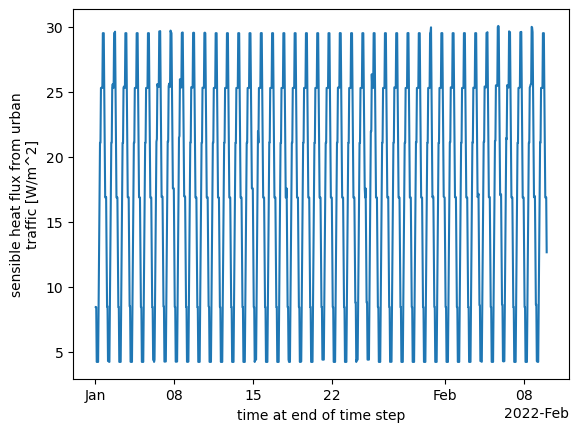

In [11]:
ds_case['TRAFFICFLUX'][:960].plot()

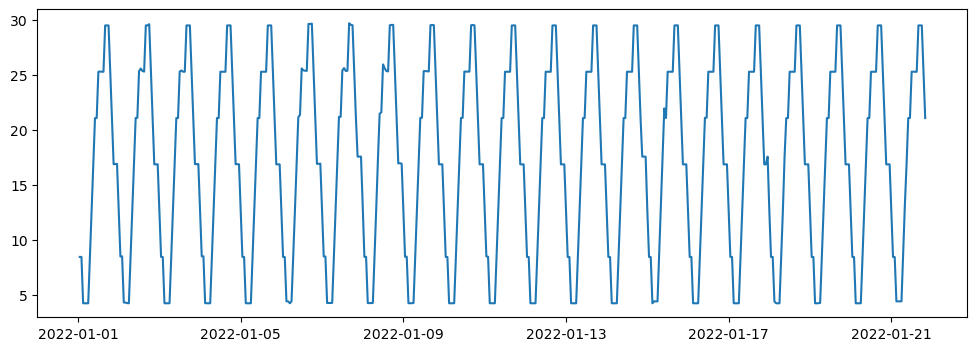

In [18]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.plot(df_all['time'][:500], df_all['TRAFFICFLUX_traffic'][:500])